The purpose of this project is to answer the following question. Given a tweet related to a specific topic or event, can we predict how often a tweet is retweeted based on its content?

In this project, we will be focusing on the dataset that can be downloaded from:

https://www.kaggle.com/rgupta09/world-cup-2018-tweets

This dataset is not a part of any Kaggle competitions. It contains the tweets posted during the FIFA World Cup 2018. Our task will be to prepare the data making it suitable for machine learning algorithms and apply a classifier to predict whether a tweet was retweeted at least two times or not. In other words, if  a tweet was retweeted 0 or 1 times, it is considered non-retweeted. The reason behind choosing the threshold equal to 2 is that if a tweet is retweeted 2 or more times, it is likely to be interesting to the broad audience of Twitter users.

We show here that including the hashtags of tweets in a separately vectorized form in addition to vectorizing the words of the main text of all tweets, increases the predictive accuracy of the model. We use the ExtraTreesClassifier (extremely randomized trees classifier) from scikit-learn since this algorithm is relatively fast, parallelizable and convenient when dealing with sparse matrices.

 ## Loading, inspecting and extracting the relevant columns

Let's first import the necessary modules.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#import the garbage collection module

import gc
gc.enable()

In [3]:
df = pd.read_csv('FIFA.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 16 columns):
ID                  530000 non-null int64
lang                530000 non-null object
Date                530000 non-null object
Source              530000 non-null object
len                 530000 non-null int64
Orig_Tweet          530000 non-null object
Tweet               529449 non-null object
Likes               530000 non-null int64
RTs                 530000 non-null int64
Hashtags            468457 non-null object
UserMentionNames    455841 non-null object
UserMentionID       455841 non-null object
Name                529945 non-null object
Place               390710 non-null object
Followers           530000 non-null int64
Friends             530000 non-null int64
dtypes: int64(6), object(10)
memory usage: 64.7+ MB


We see that our dataset contains 530000 tweets of various lengths and content. The complete meanings of the columns can be found on the webpage from which the dataset was downloaded. Let's briefly reiterate what the dataset is about. First of all it contains the column 'Orig_Tweet' which is the tweet in its original form as well as the column 'Tweet' which is a cleaned tweet. The dataset also contains a tweet id 'ID', language of a tweet 'lang', date when a tweet was posted 'Date', device using which a tweet was created 'Source', the length of a tweet 'len', the number of likes 'Likes', the number of retweets 'RTs', the list of hashtags 'Hashtags', the columns with user mentioned names and user mention ids, name and place of the person who posted a tweet as well as the number of his followers and friends.

In [5]:
df.head(10)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216
5,1013597039995867143,en,2018-07-02 01:35:40,Twitter for Android,140,"RT @FIFAWorldCup: ""We’re looking strong going ...",We re looking strong going into the knockout s...,0,153,BRAMEX,"FIFA World Cup ?,CBF Futebol,Casemiro","FIFAWorldCup,CBF_Futebol,Casemiro",Ligefut,NaN,29,283
6,1013597039978995712,en,2018-07-02 01:35:40,Twitter for iPhone,140,RT @ShShShShShSh555: I'm happy for #Russia win...,am happy for winning Especially since you know...,0,4,Russia,V?Deplorable?45 ??,ShShShShShSh555,?a?????,Mount Olympus,208,338
7,1013597038951436288,en,2018-07-02 01:35:40,Twitter Web Client,138,RT @FridaCarrillo05: When you see me\r\nWhen w...,When you see me When we feel the same feeling ...,0,1,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague",Frida Carrillo,FridaCarrillo05,"STAN LEGENDS, STAN EXO","Lima, Peru",7,9
8,1013597038188154880,en,2018-07-02 01:35:40,Twitter for Android,138,RT @FIFAWorldCup: Kasper Schmeichel takes the ...,Kasper Schmeichel takes the final award of the...,0,2199,"ManoftheMatch,CRODEN,WorldCup","FIFA World Cup ?,Budweiser","FIFAWorldCup,Budweiser",Sky Ler,NaN,1,6
9,1013597037118525440,en,2018-07-02 01:35:40,Twitter Lite,139,RT @BTSARMYNA: .@BTS_twt After 5 Years\r\n1. G...,After Years Global Puma Ambassador LG Mobile A...,0,5146,NaN,"???? & ???? ???? ™ ??,?????","BTSARMYNA,BTS_twt",Kate,Meme City,158,245


We see that all the tweets are in English.

In [6]:
df.lang.value_counts()

en    530000
Name: lang, dtype: int64

For the purposes of predictive modeling, we remove the 'ID', 'Date', 'Name', 'Place', 'UserMentionNames', 'UserMentionID' as well as 'lang' column given that all the tweets are in English. We will also remove the 'Source' (using which a retweet was made) column as a feature that is not relevant for the textual data. In other words, we remove everything that is related to a user rather than the tweets' content. 

In [7]:
df.drop(['ID', 'Date', 'Name', 'Place','UserMentionID', 'UserMentionNames',
         'lang', 'Source'], axis =1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 8 columns):
len           530000 non-null int64
Orig_Tweet    530000 non-null object
Tweet         529449 non-null object
Likes         530000 non-null int64
RTs           530000 non-null int64
Hashtags      468457 non-null object
Followers     530000 non-null int64
Friends       530000 non-null int64
dtypes: int64(5), object(3)
memory usage: 32.3+ MB


Looking at the correlation between numerical columns, we see that the number of retweets 'RTs' is almost uncorrelated with other numerical columns. It is interesting to note that the number of likes is somewhat correlated with the number of followers. 

In [8]:
df.corr()

,len,Likes,RTs,Followers,Friends
len,1.000000,0.002834,0.060993,0.012815,0.024858
Likes,0.002834,1.000000,-0.004365,0.237121,0.012415
RTs,0.060993,-0.004365,1.000000,-0.011836,-0.020850
Followers,0.012815,0.237121,-0.011836,1.000000,0.037608
Friends,0.024858,0.012415,-0.020850,0.037608,1.000000


We will drop the 'len', 'Likes', 'Followers' and 'Friends' columns as well not only because they are uninformative, but also because they do not serve the main purpose of the task which is to make a prediction based of the text of a tweet and relevant hashtags.

In [9]:
df.drop(['len', 'Likes', 'Followers', 'Friends'], axis =1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 4 columns):
Orig_Tweet    530000 non-null object
Tweet         529449 non-null object
RTs           530000 non-null int64
Hashtags      468457 non-null object
dtypes: int64(1), object(3)
memory usage: 16.2+ MB


In [10]:
gc.collect()

47

Then, we see that after cleaning the original tweets according to the rules of the databese provider, some cleaned tweets became empty. Our purpose is to do our own text cleaning and  preprocessing. Thus we drop the 'Tweet' column that contains the cleaned tweets. Quite many tweets do not contain any hashtags, and this is absolutely normal.

In [11]:
df.drop(['Tweet'], axis =1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 3 columns):
Orig_Tweet    530000 non-null object
RTs           530000 non-null int64
Hashtags      468457 non-null object
dtypes: int64(1), object(2)
memory usage: 12.1+ MB


In [12]:
df[df['Hashtags'].isnull()]

,Orig_Tweet,RTs,Hashtags
9,RT @BTSARMYNA: .@BTS_twt After 5 Years\r\n1. G...,5146,NaN
14,RT @IanStaffs: Just worked out that if England...,7,NaN
15,RT @CCFCFan1927: People getting rightly excite...,6889,NaN
17,RT @Onyema_Donald: ?? Edinson Cavani for Napol...,70,NaN
18,"RT @FIFAWorldCup: ?? | ""Japan have never made ...",219,NaN
...,...,...,...
529964,RT @NOTSportsCenter: BREAKING: The Golden Stat...,848,NaN
529966,RT @FEMENSWE: PUSSY RIOT\r\n1. Let all poli...,9,NaN
529968,RT @K_SUPREME_ZA: Please guys please please he...,87,NaN
529970,RT @FourFourTweet: According to various report...,1308,NaN


## Exploratory Data Analysis and further preprocessing

First of all, we substitute the absent hashtags with the word 'nohashtags'.

In [13]:
df['Hashtags'] = df['Hashtags'].fillna('nohashtags')

#df.isnull().sum()

Second, we notice that are only 133390 unique original tweets, and 37140 unique combinations of hashtags. This means that the same tweet may have been retweeted many times from different places. 

In [14]:
df[['Orig_Tweet', 'Hashtags']].nunique()

Orig_Tweet    133390
Hashtags       37140
dtype: int64

We will group by the unique combinations of original tweets and hashtags and average over all the numbers of retweets. This is to ensure that the retweet by a given user is counted exactly once.
After that, we are left with 133390 unique entries.

In [15]:
df = df.groupby(['Orig_Tweet', 'Hashtags']).mean().reset_index()

df['RTs'] = df['RTs'].astype(np.int64)

df.head()

,Orig_Tweet,Hashtags,RTs
0,!!! BIG FINAL !!!\r\nFIFA WORLD CUP RUSSIA 201...,"fifaworldcup2018,FRNvsCRO,france,vs,croatia,fi...",0
1,!!! Give away time !!!!\r\nWe are giving away ...,"irishgnt,russells,oldcarrickmill,Competition,g...",1
2,!!#WorldCup Pre-Match TIP!!\r\n(A Penalty in t...,"WorldCup,Bet,Football,Tip,BEL,FRA",0
3,!!#WorldCup TIP!! @bet365 #BetBuilder\r\n(Over...,"WorldCup,BetBuilder,Bet,Football,Tip,FRA,BEL",0
4,"!![##LIVE STREAM##]#+=&gt; France vs,. Belgium...","LIVE,WorldCup",0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133390 entries, 0 to 133389
Data columns (total 3 columns):
Orig_Tweet    133390 non-null object
Hashtags      133390 non-null object
RTs           133390 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


The number of retweets are broadly distributed (with a peak around zero) although this distribution is highly non-uniform. The absolute majority of tweets have zero and small number of retweets.

In [17]:
df.describe()

,RTs
count,133390.000000
mean,38.300532
std,509.367267
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,58182.000000


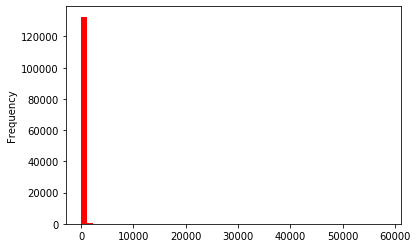

In [18]:
df['RTs'].plot.hist(bins=50, color = 'red')
plt.show()

Very few tweets resulted in large number of retweets as one can see from below.

In [19]:
for i in [100, 500, 1000, 5000, 10000]:
    print('{} tweets have the number of retweets greater than {}.'\
          .format(len(df[df.RTs >i].index), i))

5546 tweets have the number of retweets greater than 100.
1657 tweets have the number of retweets greater than 500.
878 tweets have the number of retweets greater than 1000.
142 tweets have the number of retweets greater than 5000.
59 tweets have the number of retweets greater than 10000.


In fact, 58 percent of tweets were never retweeted.

In [20]:
print('The fraction of tweets that were never retweeted is:',
     df.loc[df.RTs == 0]['RTs'].count()/len(df.index))

The fraction of tweets that were never retweeted is: 0.5852537671489617


Finally, we create a new column 'Retweeted?' that has the values 0 and 1. 0 corresponds to a tweet that was retweeted 0 or 1 times, and 1 describes the situation when a tweet was retweeted at least twice. We see that our dataset becomes highly imbalanced.

In [21]:
#df['Retweeted?'] = df['RTs'].map(lambda x: 0 if x == 0 else 1)

df['Retweeted?'] = df['RTs'].map(lambda x: 0 if x <= 1 else 1)

In [22]:
df['Retweeted?'].value_counts()

0    95670
1    37720
Name: Retweeted?, dtype: int64

## Text Preprocessing 

Let's now proceed to preparing the text suitable machine learning algorithms. 

In [23]:
import re

(i) We first remove RT signs, urls, hashtags, user mentions, \n, \r form the tweets. We also  remove spaces from the sides.

In [24]:
def clean1(tw):
    
    #remove hashtags
    x = re.sub(r'#\S+', '', tw)
    
    #remove user-mentions
    x = re.sub(r'@\S+', '', x)
    
    #remove urls
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r'ftp\S+', '', x)
    
    # remove \n and \r
    x = re.sub(r'\r|\n', '', x)
    
    #remove RT signs
    x = re.sub(r'RT', '', x)
    x = re.sub(r'&amp', '', x)
    
    #remove spaces from the sides
    x = x.strip()
    
    return x
    
df['Orig_Tweet'] = df['Orig_Tweet'].map(clean1)

(ii) Then, we will substitute the contractions with more readable expressions (I'll -> I will etc). This is not perfect, because for example 'I'd' can be interpreted as 'I had' and 'I would' depending on the tense. It is not a problem because the auxiliary verbs will be removed later anyway.

In [25]:
def decontracted(tw):
    
    #substitute the type of apostrophe
    x = re.sub(r'\’', '\'', tw)
    
    x = re.sub(r'won\'t', 'will not', x)
    x = re.sub(r'can\'t', 'can not', x)
    x = re.sub(r'n\'t', ' not', x)
    x = re.sub(r'\'re', ' are', x)
    x = re.sub(r'\'s', ' is', x)
    x = re.sub(r'\'d', ' would', x)
    x = re.sub(r'\'ll', ' will', x)
    x = re.sub(r'\'t', ' not', x)
    x = re.sub(r'\'ve', ' have', x)
    x = re.sub(r'\'m', ' am', x)
    
    return x

df['Orig_Tweet'] = df['Orig_Tweet'].map(decontracted)

In [26]:
#df['Orig_Tweet'].tail(50)

(iii) After that, we remove punctuation as well as digits, duplicate spaces inside the tweets and make everything lowercase.

In [27]:
def clean2(tw):
    
    #remove punctuation and digits
    x = re.sub(r'[^a-zA-Z]+', ' ', tw)
    
    #remove duplicate spaces
    x = re.sub('\s{2,}', ' ', x)
    
    #make lowecase
    x = x.lower()
    
    #remove spaces from the sides
    x = x.strip()
    
    return x
 
df['Orig_Tweet'] = df['Orig_Tweet'].map(clean2)

In [28]:
#df['Orig_Tweet'].head()

Then we create our own list of stopwords. Not all stopwords privided by nltk should be removed.

In [29]:
#import nltk
#nltk.download('stopwords')
 
from nltk.corpus import stopwords   
#print(list(set(stopwords.words('english'))))

In [30]:
 not_stopwords =['now', 'both', 'before', 'below', 'above','some',
               'most', 'through', 'other', 'through', 'such', 'only',
                 'over', 'during', 'against', 'again', 'under', 'few',
                 'after', 'between', 'further', 'very', 'once', 'more',
                'no', 'not', 'nor']

In [31]:
my_stopwords = list(set(stopwords.words('english')) - set(not_stopwords))

#print(my_stopwords)

Let's also rename the column 'Orig_Tweet' back to 'Tweet'.

In [32]:
# rename column 'Orig_Tweet' back  to 'Tweet'
df = df.rename(columns={"Orig_Tweet": "Tweet"}, copy = False)

As a final preprocessing step, we will make all the hashtags lowercase, and add back the hashtag sign '#' to distinguish the hashtags form the usual words.

In [33]:
# make all hashtags lowercase 
df['Hashtags'] = df['Hashtags'].map(lambda x: x.lower())

#df['Hashtags'].iloc[6785]

In [34]:
# the 'Hashtags' column contains the text of comma-separated hashtags;
# so we first split the text and then add '#' to each element separately.

def add_hashtag_sign(x):
    
    y = x.split(',')
    for i in range(len(y)):
        y[i]= '#'+y[i]
    
    return ','.join(y)

df['Hashtags'] = df['Hashtags'].map(add_hashtag_sign)

#df['Hashtags'].iloc[6785]

## Predicitve Modelling I (text without hashtags)

In this part, we will use TfidfVectorizer along with ExtraTreesClassifier to perform the GridSearch crossvalidation to determine the minimum document frequency giving the best accuracy. There is no sense to tune other parameters such as maximum document frequency and maximum number of features because tweets are short and diverse.

The procedure will be performed based only on the 'Tweet' column containing the text of a tweet without hashtags. Because of the size of the dataset, we use only 3-fold cross-validation and 20 estimators in our tree-based classifier. TfidfVectorizer will be applied to uni-grams and bi-grams meaning that ngram_range = (1,2).

In [35]:
# import the necessary classes

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [36]:
# shuffle the dataframe

df = df.sample(frac=1, random_state = 321)

In [37]:
#make the train-test split

X, y = df['Tweet'], df['Retweeted?']

X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.25, stratify = y, random_state= 53)

Before applying the TfidfVectorizer to the text of a tweet, we use the PorterStemmer to stem the words.

In [38]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()\
            if word not in my_stopwords]

In [39]:
%%time

#apply the TfidfVectorizer to the stemmed test of the 'Tweet'
tfidf = TfidfVectorizer(stop_words=my_stopwords, 
                                   ngram_range=(1, 2),
                                  tokenizer = tokenizer_porter)

#initiate ExtraTreesClassifier with 20 estimators
extclass = ExtraTreesClassifier(n_estimators=20, 
                             max_depth = None, 
                             max_features = 'auto', bootstrap = False,  
                             n_jobs = -1, random_state = 987)

#make the pipeline
pipe = Pipeline([('tfidf', tfidf), ('extclass', extclass)])

#we search the minimum document frequency amon values 1,2 and 3
param_grid = {'tfidf__min_df':[1,2,3]}

grid = GridSearchCV(pipe, param_grid = param_grid, cv =3, n_jobs =-1)

grid.fit(X_train, y_train)

print('Best patameters:', grid.best_params_)

print('The best cross-validation accuracy:', grid.best_score_)

print('Test accuracy score:', grid.score(X_test, y_test))

Best patameters: {'tfidf__min_df': 1}
The best cross-validation accuracy: 0.7617100882125194
Test accuracy score: 0.7821158690176322
Wall time: 1h 30min 52s


We see that the test accuracy score is about 0.78 which is not very high, albeit we used only 20 estimators. Higher number of estimators is expected to increase this score only slightly. We see also that the optimal document frequency is 1. 

In [40]:
del X_train, X_test, y_train, y_test, X, y, tfidf, extclass, pipe

gc.collect()

38

## Predicitve Modelling II (text and hashtags)

In this section, we do the predictive modeling keeping both the 'Tweet' column that contains the words of the main text, and the 'Hashtags column'. Applying TfidfVectorizers to both columns we use min_df=1. 

In [41]:
#make the train-test split

X1, X2, y = df['Hashtags'], df['Tweet'], df['Retweeted?']

X1_train, X1_test, X2_train, X2_test, y_train, y_test =\
train_test_split(X1, X2, y,test_size=0.25, stratify = y, random_state= 53)

In [42]:
# apply TfidfVectorizer to 'Hashtags'

tfidf_vectorizer1 = TfidfVectorizer(stop_words=None, 
                                    min_df = 1,
                                   ngram_range=(1, 2),
                                  tokenizer = None)

tfidf_train1 = tfidf_vectorizer1.fit_transform(X1_train.values)

tfidf_train1

<100042x52472 sparse matrix of type '<class 'numpy.float64'>'
	with 404374 stored elements in Compressed Sparse Row format>

Before applying the TfidfVectorizer to the 'Tweet' column, we use the PorterStemmer to stem the words.

In [43]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()\
            if word not in my_stopwords]

In [44]:
#apply the TfidfVectorizer to the stemmed test of the 'Tweet'

tfidf_vectorizer2 = TfidfVectorizer(stop_words=my_stopwords, 
                                   ngram_range=(1, 2), min_df =1,
                                  tokenizer = tokenizer_porter)

tfidf_train2 = tfidf_vectorizer2.fit_transform(X2_train.values)

tfidf_train2

<100042x332543 sparse matrix of type '<class 'numpy.float64'>'
	with 1474988 stored elements in Compressed Sparse Row format>

We then transform the X1_test and X2_test using the corresponding TfidfVecorizers and concatenate horizontally two pairs of sparse matrices.

In [45]:
tfidf_test1 = tfidf_vectorizer1.transform(X1_test.values)
tfidf_test2 = tfidf_vectorizer2.transform(X2_test.values)

In [46]:
from scipy.sparse import hstack

tfidf_train = hstack([tfidf_train2, tfidf_train1])
tfidf_test = hstack([tfidf_test2, tfidf_test1])

#tfidf_train

In [47]:
tfidf_train

<100042x385015 sparse matrix of type '<class 'numpy.float64'>'
	with 1879362 stored elements in COOrdinate format>

In [48]:
y_train = y_train.values
y_test = y_test.values

In [49]:
gc.collect()

100

We now use the ExtraTreesClassifier to do the predictive modeling using as many as 100 estimators (this is in fact the default value). Given the size of the dataset, it takes a long time to complete the training on CPU.

In [50]:
%%time

extclass = ExtraTreesClassifier(n_estimators=100, 
                             max_depth = None, 
                             max_features = 'auto', bootstrap = False,  
                             n_jobs = -1, random_state = 987)

extclass.fit(tfidf_train, y_train)

y_train_pred = extclass.predict(tfidf_train)
y_test_pred = extclass.predict(tfidf_test)

print('Train accuracy score:', accuracy_score(y_train_pred, y_train))
print('Test accuracy score:', accuracy_score(y_test_pred, y_test))

Train accuracy score: 0.9868755122848404
Test accuracy score: 0.8087141657670625
Wall time: 2h 8min 50s


We see that vectorizing the lists of hashtags and concatenating the corresponding matrix with the matrix of vectorized words of the main text, helped to raise the accuracy on the test set to 0.81. Plotting the confusion matrix we see that the main error comes from the fact that too many retweeted twits were incorrectly predicted as not retweeted. If not retweeted tweets are labeled as negative and retweeted as positive, we are dealing with the problem of large number of false negatives. This problem is not uncommon for imbalanced datasets.

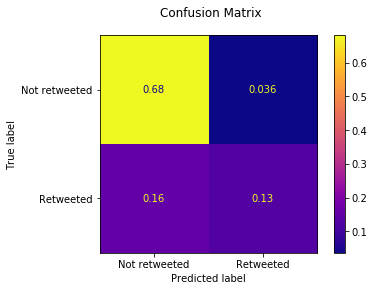

In [51]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(extclass, tfidf_test, y_test,
                                 display_labels=['Not retweeted', 'Retweeted'],
                                 normalize = 'all', cmap = 'plasma')

disp.figure_.suptitle("Confusion Matrix")


plt.show()

## Conclusion

To conclude, we addressed the following classification and natural language processing problem: Can we predict whether a tweet is retweeted at least twice based on its content. We made all the text preprocessing from scratch followed by Tf-idf vectorization, and used ExtraTrees Classifier to do the predictive modeling. We showed that better results can be obtained if the hashtags that may be present in a tweet are vectorized separately and added to the vectorized words of the main text.
The accuracy on the test set achieved as a result of training is about 0.81. This is not very high but probably reasonable given the fact we deal with very short and diverse samples of the text. To achieve higher accuracy, one needs to think how one can reduce the number of false negatives as a result of making predictions. For the future, one can try to address the same problem with the help of deep learning, albeit training the neural networks of deep architecture may be prohibitive given the size of the dataset and absence of GPU.  